<a href="https://colab.research.google.com/github/sckgn/FinalYearProject_ML/blob/main/GridSearchCVFemale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [2]:
asd_2018_df = pd.read_csv('dataset_2018.csv')

In [3]:
asd_2018_df.rename(columns={'Class/ASD Traits ':'ASD_Traits'}, inplace=True)

In [4]:
grid_fem = asd_2018_df[asd_2018_df['Sex']=='f']

In [5]:
grid_fem = grid_fem.drop(['Case_No', 'Qchat-10-Score','Who completed the test','Ethnicity','Sex'], axis=1)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [7]:
X_grid = grid_fem.drop("ASD_Traits", axis=1)
y_grid = grid_fem["ASD_Traits"]

X_grid_train, X_grid_test, y_grid_train, y_grid_test = train_test_split(X_grid, y_grid, test_size=0.3, random_state=42, stratify=y_grid)


In [8]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

encoder = OrdinalEncoder()
y_encoder = LabelEncoder()
scaler = MinMaxScaler()

age = ['Age_Mons']
char_vals = ['Jaundice','Family_mem_with_ASD']
target = ['ASD_Traits']

In [9]:
def preprocessing(X_train, y_train, X_test, y_test):
  X_train[age] = scaler.fit_transform(X_train[age].values.reshape(-1,1))
  X_test[age] = scaler.transform(X_test[age].values.reshape(-1,1))
  for c in char_vals:
    X_train[c] = encoder.fit_transform(X_train[c].values.reshape(-1,1))
    X_test[c] = encoder.transform(X_test[c].values.reshape(-1,1))
  y_train = y_encoder.fit_transform(y_train.values.ravel())
  y_test = y_encoder.transform(y_test.values.ravel())

In [10]:
  X_grid_train[age] = scaler.fit_transform(X_grid_train[age].values.reshape(-1,1))
  X_grid_test[age] = scaler.transform(X_grid_test[age].values.reshape(-1,1))
  for c in char_vals:
    X_grid_train[c] = encoder.fit_transform(X_grid_train[c].values.reshape(-1,1))
    X_grid_test[c] = encoder.transform(X_grid_test[c].values.reshape(-1,1))
  y_grid_train = y_encoder.fit_transform(y_grid_train.values.ravel())
  y_grid_test = y_encoder.transform(y_grid_test.values.ravel())

In [11]:
print(y_grid_test)

[1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0
 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1
 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0]


##**Logistic Regression**

In [12]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)

In [13]:
param_grid = {
    'C'       : np.logspace(-3,3,7),
}

In [14]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [15]:
metrics ={'accuracy': make_scorer(accuracy_score),
          'precision': make_scorer(precision_score, average='binary', pos_label=1),
          'recall': make_scorer(recall_score,average='binary',pos_label=1),
          'f1_score': make_scorer(f1_score,average='binary',pos_label=1)}

In [16]:
from sklearn.model_selection import GridSearchCV

log_grid = GridSearchCV(log_reg, param_grid=param_grid, cv=5, scoring = metrics, refit='accuracy')

In [17]:
log_grid.fit(X_grid_train, y_grid_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score, average=binary, pos_label=1),
                      'precision': make_scorer(precision_score, average=binary, pos_label=1),
                      'recall': make_scorer(recall_score, average=binary, pos_label=1)})

In [18]:
def show_grid_cv_results(model):
  accuracy = model.cv_results_['mean_test_accuracy']
  precision = model.cv_results_['mean_test_precision']
  recall = model.cv_results_['mean_test_recall']
  f1 = model.cv_results_['mean_test_f1_score']

  print("Best parameters: {}".format(model.best_params_))
  print("Best score: {:.2f}".format(model.best_score_))
  print("Accuracy: ", accuracy.mean())
  print("Precision: ", precision.mean())
  print("Recall: ", recall.mean())
  print("F1 Score: ", f1.mean())

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

def final_evaluation(model, predictors, target):
  predictions = model.predict(predictors)
  print("Accuracy: ", accuracy_score(target, predictions))
  print("Precision[YES]: ", precision_score(target, predictions, average='binary', pos_label=1))
  print("Recall[YES]: ", recall_score(target, predictions,average='binary', pos_label=1))
  print("F1[YES]: ", f1_score(target, predictions,average='binary', pos_label=1))

  ConfusionMatrixDisplay.from_estimator(model, predictors, target)

In [20]:
show_grid_cv_results(log_grid)

Best parameters: {'C': 1000.0}
Best score: 0.99
Accuracy:  0.917878787878788
Precision:  0.9124866332584878
Recall:  0.9936507936507937
F1 Score:  0.9450613869392528


In [21]:
best_est = log_grid.best_estimator_

Accuracy:  1.0
Precision[YES]:  1.0
Recall[YES]:  1.0
F1[YES]:  1.0


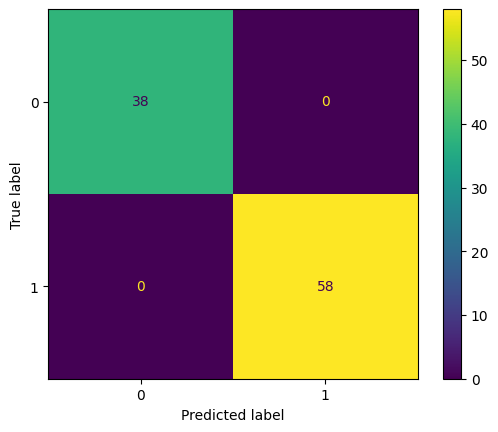

In [22]:
final_evaluation(log_grid,X_grid_test, y_grid_test)

### **Feature importance**

In [23]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

**Chi squared**

In [24]:
best = SelectKBest(chi2, k='all')

X_train_best = best.fit_transform(X_grid_train,y_grid_train)
X_test_best = best.transform(X_grid_test)

bestLR = LogisticRegression()
bestLR.fit(X_train_best,y_grid_train)

LogisticRegression()

In [25]:
# Get the chi2 scores and names for each feature
chi2_scores = best.scores_
feature_names = np.array(X_grid_train.columns)
selected_mask = best.get_support()

sorted_indices = chi2_scores.argsort()[::-1]
sorted_scores = chi2_scores[sorted_indices]
sorted_features = feature_names[selected_mask][sorted_indices]

# Print the feature names and their corresponding chi2 scores
for feature, score in zip(sorted_features, sorted_scores):
    print(f"{feature}: {score:.3f}")

A4: 49.426
A6: 48.695
A9: 47.730
A1: 47.417
A5: 39.984
A3: 38.899
A7: 36.755
A2: 29.501
A8: 24.381
A10: 4.053
Family_mem_with_ASD: 1.319
Age_Mons: 1.124
Jaundice: 0.036


**Information gain**

In [26]:
best_info = SelectKBest(mutual_info_classif, k='all')

X_info_selected = best_info.fit_transform(X_grid_train,y_grid_train) 


In [27]:
info_scores = best_info.scores_

info_mask = best_info.get_support()

sorted_indices_info = info_scores.argsort()[::-1]
sorted_scores_info = info_scores[sorted_indices_info]
sorted_feat_info = feature_names[info_mask][sorted_indices_info]

for feature, score in zip(sorted_feat_info,sorted_scores_info):
  print(f"{feature}: {score:.3f}")

A6: 0.279
A9: 0.230
A1: 0.227
A4: 0.221
A7: 0.171
A2: 0.138
A5: 0.132
A3: 0.128
A8: 0.105
Age_Mons: 0.029
Family_mem_with_ASD: 0.000
Jaundice: 0.000
A10: 0.000


In [28]:
new_info_scores = mutual_info_classif(X_grid_train, y_grid_train, random_state=42)

sorted_info_gain = sorted(zip(new_info_scores, feature_names), reverse=True)

print("{:<20} {:<10}".format('Feature', 'Importance'))
print("----------------------------------------")
for coef, feat in sorted_info_gain:
    print("{:<20} {:.4f}".format(feat, abs(coef)))


Feature              Importance
----------------------------------------
A6                   0.2485
A4                   0.2311
A9                   0.2266
A1                   0.2206
A7                   0.2183
A3                   0.1997
A5                   0.1670
A8                   0.0979
A2                   0.0933
Age_Mons             0.0357
A10                  0.0071
Jaundice             0.0000
Family_mem_with_ASD  0.0000


**Feature Coefficients**

In [29]:
coefs = best_est.coef_
sorted_importance = sorted(zip(coefs[0], feature_names), reverse=True)

print("{:<20} {:<10}".format('Feature', 'Importance'))
print("----------------------------------------")
for coef, feat in sorted_importance:
    print("{:<20} {:.4f}".format(feat, abs(coef)))


Feature              Importance
----------------------------------------
A4                   11.1442
A1                   10.6924
A6                   9.8949
A9                   9.6401
A8                   9.1792
A2                   9.0550
A10                  8.7933
A5                   8.5406
A7                   8.1778
A3                   6.6090
Family_mem_with_ASD  3.3605
Age_Mons             3.1499
Jaundice             1.4116


##**SVM**

In [30]:
from sklearn.svm import SVC

In [31]:
svc = SVC(random_state=42)

In [32]:
svc_param_grid = {
    'C': [0.1,1, 10, 100],
    'gamma': [1,0.1,0.01,0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

In [33]:
svc_grid = GridSearchCV(svc, param_grid = svc_param_grid, cv=5, scoring=metrics,refit='accuracy')

In [34]:
svc_grid.fit(X_grid_train, y_grid_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score, average=binary, pos_label=1),
                      'precision': make_scorer(precision_score, average=binary, pos_label=1),
                      'recall': make_scorer(recall_score, average=binary, pos_label=1)})

In [35]:
show_grid_cv_results(svc_grid)

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best score: 0.99
Accuracy:  0.8144234006734007
Precision:  0.8241711162146741
Recall:  0.9572916666666668
F1 Score:  0.8742423967040338


In [36]:
svc_grid.best_estimator_.kernel

'rbf'

Accuracy:  0.9791666666666666
Precision[YES]:  0.9666666666666667
Recall[YES]:  1.0
F1[YES]:  0.983050847457627


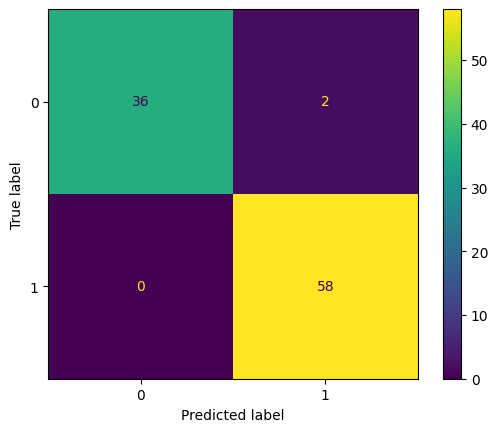

In [37]:
final_evaluation(svc_grid, X_grid_test,y_grid_test)

In [38]:
from sklearn.inspection import permutation_importance

svc_perm = permutation_importance(svc_grid, X_grid_test, y_grid_test, n_repeats=10, random_state=0)
svc_importances = svc_perm.importances_mean

for feature_name, importance in sorted(zip(feature_names, svc_importances)):
    print(f"{feature_name}: {importance:.4f}")

A1: 0.0667
A10: 0.0437
A2: 0.0521
A3: 0.0260
A4: 0.0542
A5: 0.0448
A6: 0.0323
A7: 0.0396
A8: 0.0677
A9: 0.0573
Age_Mons: 0.0115
Family_mem_with_ASD: -0.0063
Jaundice: 0.0094


## **Random Forest**

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf_param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'criterion' : ['gini','entropy','log_loss'], #Function applied for measuring quality of a split
    'max_depth': [None, 10, 20],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']  # Number of features to consider when looking for the best split
}

In [41]:
rf_grid  = GridSearchCV(rf, rf_param_grid, cv=5,scoring=metrics,refit='accuracy')
rf_grid.fit(X_grid_train,y_grid_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score, average=binary, pos_label=1),
                      'precision': make_scorer(precision_score, average=binary, pos_label=1),
                      'recall': make_scorer(recall_score, average=binary, pos_label=1)})

In [42]:
show_grid_cv_results(rf_grid)

Best parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.98
Accuracy:  0.9634019204389576
Precision:  0.9621047725432569
Recall:  0.9799758312103992
F1 Score:  0.9704381630187411


In [44]:
best_rf = rf_grid.best_estimator_
best_rf

RandomForestClassifier(random_state=42)

Accuracy:  0.9375
Precision[YES]:  0.9193548387096774
Recall[YES]:  0.9827586206896551
F1[YES]:  0.95


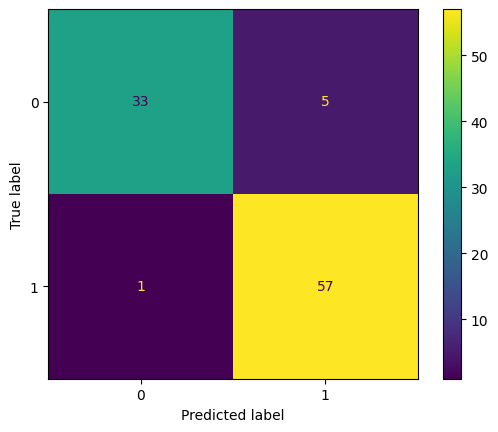

In [45]:
final_evaluation(rf_grid, X_grid_test, y_grid_test)

In [46]:
new_rf = RandomForestClassifier(random_state=42, criterion='gini',max_depth = None, max_features = 'sqrt', min_samples_leaf =  1, min_samples_split =  2, n_estimators =  100 )

In [47]:
new_rf.fit(X_grid_train, y_grid_train)

RandomForestClassifier(random_state=42)

Accuracy:  0.9375
Precision[YES]:  0.9193548387096774
Recall[YES]:  0.9827586206896551
F1[YES]:  0.95


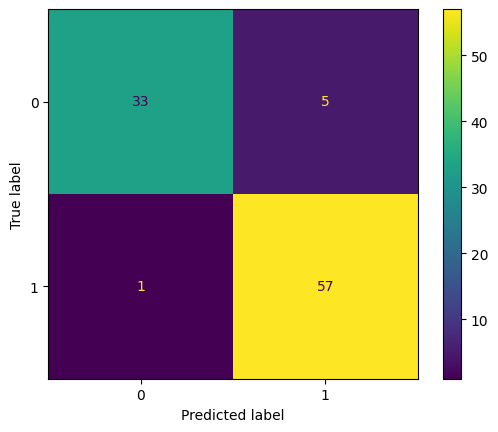

In [48]:
final_evaluation(new_rf, X_grid_test, y_grid_test)

**Feature Importance**